In [1]:
## Keras configuration

# Set KERAS backend to Theano
import os
os.environ['KERAS_BACKEND']='theano'

# Load Keras
import keras

# Load the libraries
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

Using Theano backend.


In [2]:
import pandas as pd

In [3]:
# Load data for Node 150
node150 = pd.read_csv('https://raw.githubusercontent.com/Amitangshu/Irradiance_sensing/master/All_Data_For_EPIC_Roof/MDA300n150.dat',
                     header=1)

In [4]:
# Load data for Node 151
node151 = pd.read_csv('https://raw.githubusercontent.com/Amitangshu/Irradiance_sensing/master/All_Data_For_EPIC_Roof/MDA300n151.dat',
                     header=1)

In [5]:
# Load data for Node 152
node152 = pd.read_csv('https://raw.githubusercontent.com/Amitangshu/Irradiance_sensing/master/All_Data_For_EPIC_Roof/MDA300n152.dat',
                     header=1)

In [6]:
# Load data for Node 153
node153 = pd.read_csv('https://raw.githubusercontent.com/Amitangshu/Irradiance_sensing/master/All_Data_For_EPIC_Roof/MDA300n153.dat',
                      header=1, skiprows=[47728])

In [7]:
# Split TimeStamp into Date and Time columns
node150[['DATE','TIME']] = node150.TMSTAMP.str.split(expand=True)
node151[['DATE','TIME']] = node151.TMSTAMP.str.split(expand=True)
node152[['DATE','TIME']] = node152.TMSTAMP.str.split(expand=True)
node153[['DATE','TIME']] = node153.TMSTAMP.str.split(expand=True)

In [8]:
# Explore data to see the distribution of irradiance values across 4 nodes
count0 = node150.IRRADIANCE.value_counts()
count0.index

Float64Index([   2.92,    5.83,    8.75,   11.67,   20.42,   14.58,    35.0,
                 17.5,   55.41,   26.25,
              ...
              3094.41, 7151.27, 6602.96, 6675.88, 7256.26, 4742.24, 8026.22,
              1388.26, 3505.64, 2397.37],
             dtype='float64', length=2003)

In [9]:
count1 = node151.IRRADIANCE.value_counts()
count1.index

Float64Index([   2.92,    8.75,    5.83,   20.42,   11.67,    17.5,   14.58,
                 35.0,   23.33,   32.08,
              ...
              1157.85, 1300.76, 1154.94, 1137.44, 1233.68, 1152.02, 1172.43,
              1181.18,  1166.6,  1201.6],
             dtype='float64', length=408)

In [10]:
count2 = node152.IRRADIANCE.value_counts()
count2.index

Float64Index([   3.07,    6.14,    9.21,   18.41,   15.34,   21.48,   12.27,
                 58.3,   36.82,   27.62,
              ...
               837.68,  856.09,  834.61,  853.02,  908.25,  984.96, 1006.44,
               862.23,  831.54,     0.0],
             dtype='float64', length=292)

In [11]:
count3 = node153.IRRADIANCE.value_counts()
count3.index

Float64Index([   2.81,    5.62,    8.44,   19.69,   11.25,   14.06,   16.87,
                53.44,   25.31,    22.5,
              ...
              1319.01, 1327.44, 1366.82, 1333.07, 1330.25, 1392.13, 1316.19,
              1349.94,  1386.5,  1364.0],
             dtype='float64', length=485)

In [12]:
# Select 4 class values
class_values = [2.92, 8.75, 3.07, 2.81]

In [13]:
# Subset data by the selected class values
subset150 = node150[node150.IRRADIANCE.isin(class_values)]
subset151 = node151[node151.IRRADIANCE.isin(class_values)]
subset152 = node152[node152.IRRADIANCE.isin(class_values)]
subset153 = node153[node153.IRRADIANCE.isin(class_values)]

In [64]:
# Merge the subsets
A_merge = pd.merge(subset150, subset151, how='outer')
B_merge = pd.merge(subset152, subset153, how='outer')
data = pd.merge(A_merge, B_merge, how='outer')

In [65]:
data.head()

TMSTAMP  RECNBR  PARENT  IRRADIANCE  SOLAROCV  VBATT   TEMP  \
0  2012-09-14 19:17:40      16       0        8.75      0.93   3.06  80.75   
1  2012-09-14 19:18:38      17       0        8.75      0.93   3.06  80.59   
2  2012-09-14 19:19:38      18       0        8.75      0.87   3.06  80.43   
3  2012-09-14 19:20:37      19       0        8.75      0.88   3.06  80.22   
4  2012-09-14 19:21:34      20       0        8.75      0.93   3.06  80.04   

         DATE      TIME  
0  2012-09-14  19:17:40  
1  2012-09-14  19:18:38  
2  2012-09-14  19:19:38  
3  2012-09-14  19:20:37  
4  2012-09-14  19:21:34

In [66]:
# Transform Time column into numeric (hours)
data.TIME = pd.to_timedelta(data.TIME)
data.TIME = data.TIME.dt.seconds/3600

In [67]:
# Creating labels:

# Convert the labels into categorical classification
# Class values: {2.92, 8.75, 3.07, 2.81} correspond to {0, 1, 2, 3}
data.loc[data.IRRADIANCE==2.92, 'IRRADIANCE'] = 0
data.loc[data.IRRADIANCE==8.75, 'IRRADIANCE'] = 1
data.loc[data.IRRADIANCE==3.07, 'IRRADIANCE'] = 2
data.loc[data.IRRADIANCE==2.81, 'IRRADIANCE'] = 3

In [68]:
data.head()

TMSTAMP  RECNBR  PARENT  IRRADIANCE  SOLAROCV  VBATT   TEMP  \
0  2012-09-14 19:17:40      16       0         1.0      0.93   3.06  80.75   
1  2012-09-14 19:18:38      17       0         1.0      0.93   3.06  80.59   
2  2012-09-14 19:19:38      18       0         1.0      0.87   3.06  80.43   
3  2012-09-14 19:20:37      19       0         1.0      0.88   3.06  80.22   
4  2012-09-14 19:21:34      20       0         1.0      0.93   3.06  80.04   

         DATE       TIME  
0  2012-09-14  19.294444  
1  2012-09-14  19.310556  
2  2012-09-14  19.327222  
3  2012-09-14  19.343611  
4  2012-09-14  19.359444

In [69]:
# Split data into three parts: training(40%), testing(30%), validation(30%)
# Use scikit-learn

import sklearn
from sklearn.model_selection import train_test_split

Train_Set, Test_Set = train_test_split(data, train_size=0.4, test_size=0.3, shuffle=True)

In [75]:
# Extract the feature columns: SOLAROCV, TEMP, TIME

X_train = np.array(Train_Set[['SOLAROCV','TEMP','TIME']]).astype('float64')
X_test = np.array(Test_Set[['SOLAROCV','TEMP','TIME']]).astype('float64')

# Input Shape
shape_ord = (X_train[0].shape)

In [71]:
# Extract the label column: IRRADIANCE

# Cast the label as integer
Y_train = np.array(Train_Set[['IRRADIANCE']]).astype('int')
Y_test = np.array(Test_Set[['IRRADIANCE']]).astype('int')

from keras.utils import to_categorical
# Convert the labels into categorical form
Y_train = to_categorical(Y_train, num_classes=4)
Y_test = to_categorical(Y_test, num_classes=4)

In [77]:
shape_ord

(3,)

### Training Model 1 - CNN

**1.** Initialize the parameters

In [80]:
# Initialize the parameters
# Number of epochs
nb_epochs = 10
# Batch size
batch_size = 128
# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

**2.** Compile the model

In [97]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=3))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

**3.** Fit the model

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 260       
Total params: 4,676
Trainable params: 4,676
Non-trainable params: 0
_________________________________________________________________


In [99]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epochs, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 47917 samples, validate on 35938 samples
Epoch 1/10
47917/47917 [==============================] - 1s 20us/step - loss: 7.6099 - accuracy: 0.5271 - val_loss: 7.1011 - val_accuracy: 0.5594
Epoch 2/10
47917/47917 [==============================] - 1s 17us/step - loss: 7.5073 - accuracy: 0.5338 - val_loss: 7.1011 - val_accuracy: 0.5594
Epoch 3/10
47917/47917 [==============================] - 1s 22us/step - loss: 7.1536 - accuracy: 0.5553 - val_loss: 7.1011 - val_accuracy: 0.5594
Epoch 4/10
47917/47917 [==============================] - 1s 20us/step - loss: 7.1371 - accuracy: 0.5567 - val_loss: 7.1011 - val_accuracy: 0.5594
Epoch 5/10
47917/47917 [==============================] - 1s 20us/step - loss: 7.1094 - accuracy: 0.5584 - val_loss: 7.1011 - val_accuracy: 0.5594
Epoch 6/10
47917/47917 [==============================] - 1s 21us/step - loss: 7.1162 - accuracy: 0.5577 - val_loss: 7.1011 - val_accuracy: 0.5594
Epoch 7/10
47917/47917 [==============================] - 1s 23us/st

**4.** Visualize the results

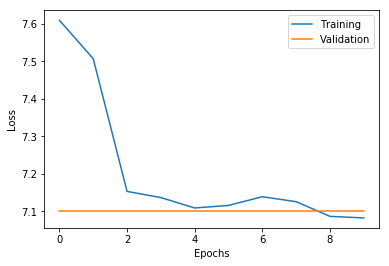

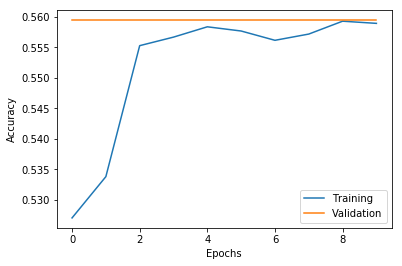

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**5.** Evaluate the accuracy of the model

In [101]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 7.101057627502404
Test Accuracy: 0.5594356656074524
